# ПРЕДВИДУВАЊЕ НА ДЕМЕНЦИЈА СО МЕТОДИ НА МАШИНСКО УЧЕЊЕ
***

Иван Јорданов
181122

# Фаза 2: Анализа на податоци

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Читање на множеството податоци

In [ ]:
## Read the CSV File Using Pandas read_csv function
df = pd.read_csv('oasis_longitudinal.csv')
data_cross = pd.read_csv('oasis_cross-sectional.csv')
# print the concise summery of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Проверување на null вредности

In [ ]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Бидејќи ќе предвидуваме врз основа на "CDR" ќе ги отфрлиме сите редици со непознати или null вредности

In [ ]:
data_cross.dropna(subset=['CDR'],inplace=True)

**Бришење на непотребни колони**
<br>
Овие колони нема да бидат од корист при предвидување на "CDR" класата

In [ ]:
data_cross.drop(columns=['ID','Delay'],inplace=True)
df = df.rename(columns={'EDUC':'Educ'})
df.drop(columns=['Subject ID','MRI ID','Visit','MR Delay'],inplace=True)

Конкатанација на двата dataset-а

In [ ]:
df = pd.concat([data_cross,df])
df.head()

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
8,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN


## Correlation Analysis

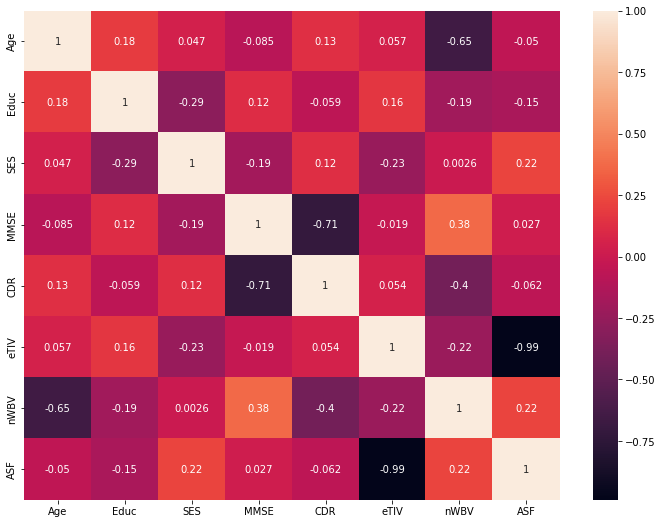

In [ ]:
cor = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cor, xticklabels=cor.columns.values,yticklabels=cor.columns.values, annot=True)

## Correlation matrix

In [ ]:
df.corr(method = 'pearson') 

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
Age,1.000000,0.184398,0.047150,-0.084787,0.133238,0.057413,-0.647799,-0.050130
Educ,0.184398,1.000000,-0.287967,0.115209,-0.058914,0.163842,-0.190078,-0.151778
SES,0.047150,-0.287967,1.000000,-0.188485,0.122739,-0.234292,0.002580,0.223962
MMSE,-0.084787,0.115209,-0.188485,1.000000,-0.711017,-0.019059,0.377745,0.027136
CDR,0.133238,-0.058914,0.122739,-0.711017,1.000000,0.053612,-0.404164,-0.061647
eTIV,0.057413,0.163842,-0.234292,-0.019059,0.053612,1.000000,-0.222960,-0.989135
nWBV,-0.647799,-0.190078,0.002580,0.377745,-0.404164,-0.222960,1.000000,0.224229
ASF,-0.050130,-0.151778,0.223962,0.027136,-0.061647,-0.989135,0.224229,1.000000


## Графици и врски на колоните

### Број на дементирани, недементирани и претворени врз база на полот на пациентот

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


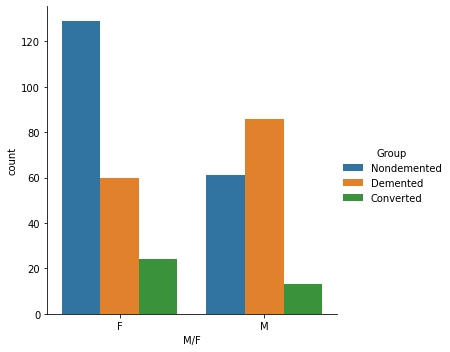

In [ ]:
import seaborn as sb
sb.factorplot('M/F',data=df,hue='Group',kind="count")

### Варирање на деменција според "MMSE" класата во зависнот од резултатот на секој пациент

(12.5, 30.0)

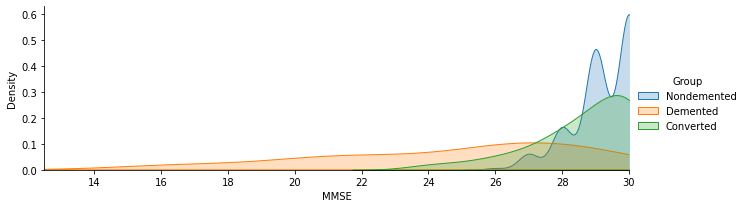

In [ ]:
facet = sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(12.5)

### Број на пациенти според возраст

In [ ]:
# Function to graph number of people by age
def count_age(field):
    plt.figure()
    g = None
    if field == "Age":
        df_query_mri = df[df["Age"] > 0]
        g = sns.countplot(df_query_mri["Age"])
        g.figure.set_size_inches(18.5, 10.5)
    else:
        g = sns.countplot(df[field])
        g.figure.set_size_inches(18.5, 10.5)
    
sns.despine()

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


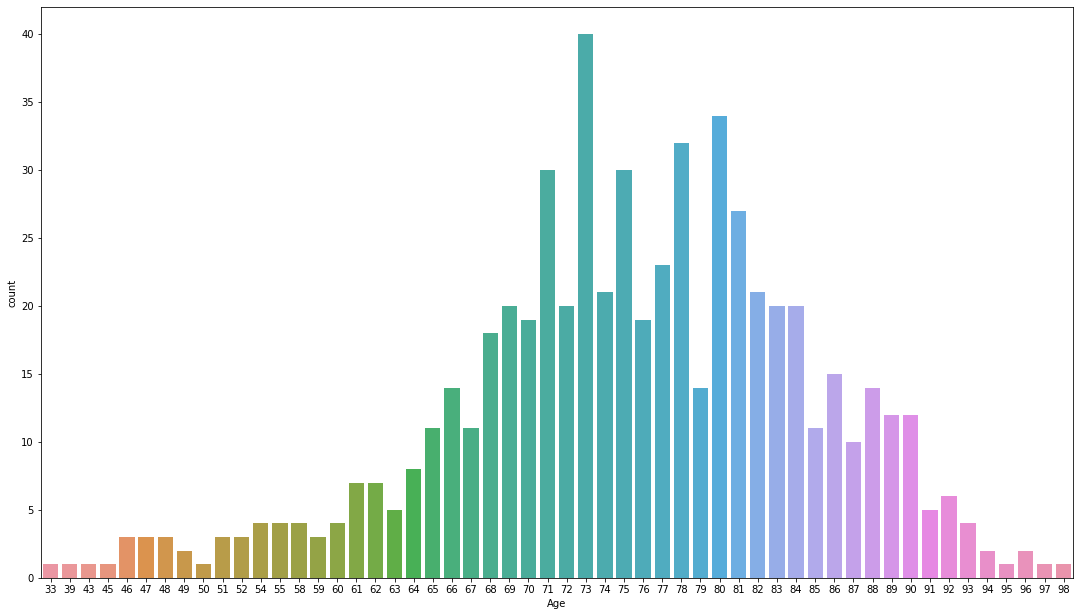

In [ ]:
count_age("Age")

### CDR според пол на пациентот

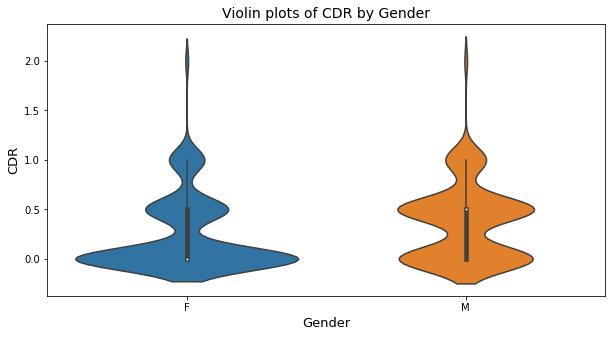

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=df)
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

### CDR според возраста на пациентот

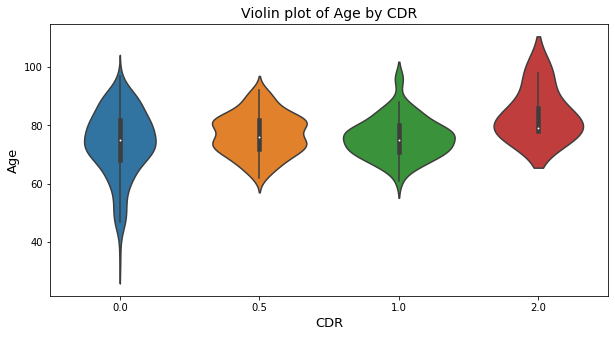

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df)
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

## Внесување на вредности во колони користејки SimpleImputer




Ги внесуваме вредностите кои што недостасуваат во "SES" колоната со најчесто појавуваниот елемент во таа колона. Слично, вредностите кои што недостасуваат во "MMSE" колоната со медијанот на таа колона.

In [ ]:
from sklearn.impute  import SimpleImputer
imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')

imputer.fit(df[['SES']])
df[['SES']] = imputer.fit_transform(df[['SES']])

# We perform it with the median
imputer = SimpleImputer ( missing_values = np.nan,strategy='median')

imputer.fit(df[['MMSE']])
df[['MMSE']] = imputer.fit_transform(df[['MMSE']])

In [ ]:
df

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
8,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN
...,...,...,...,...,...,...,...,...,...,...,...
368,M,R,82,16.0,1.0,28.0,0.5,1693,0.694,1.037,Demented
369,M,R,86,16.0,1.0,26.0,0.5,1688,0.675,1.040,Demented
370,F,R,61,13.0,2.0,30.0,0.0,1319,0.801,1.331,Nondemented
371,F,R,63,13.0,2.0,30.0,0.0,1327,0.796,1.323,Nondemented


## Енкодирање на "CDR" со помош на LabelEncoder

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['CDR'] = le.fit_transform(df['CDR'].values)

Претворање на категоричките променливи во нумерички со OneHot енкодирање.

In [ ]:
df = pd.get_dummies(df)

## Дистрибуција на таргет класата со bar plot.

<BarContainer object of 4 artists>

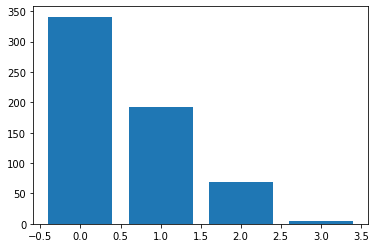

In [ ]:
plt.bar(df['CDR'].unique(),df['CDR'].value_counts())

Занемарување на последната класа поради незначителна големина во базата на податоци

In [ ]:
df = df.drop(df[df['CDR']==3].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 372
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                599 non-null    int64  
 1   Educ               599 non-null    float64
 2   SES                599 non-null    float64
 3   MMSE               599 non-null    float64
 4   CDR                599 non-null    int64  
 5   eTIV               599 non-null    int64  
 6   nWBV               599 non-null    float64
 7   ASF                599 non-null    float64
 8   M/F_F              599 non-null    uint8  
 9   M/F_M              599 non-null    uint8  
 10  Hand_R             599 non-null    uint8  
 11  Group_Converted    599 non-null    uint8  
 12  Group_Demented     599 non-null    uint8  
 13  Group_Nondemented  599 non-null    uint8  
dtypes: float64(5), int64(3), uint8(6)
memory usage: 45.6 KB


## Нормализација на базата.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
y = df.pop('CDR')
x = df

In [ ]:
x = StandardScaler().fit_transform(x)

# Фаза 3: Креирање и употреба на модели

## Поделба на базата на train и test.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from functools import reduce
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42,test_size=0.3)

## Cross-validation 

### XGBClassifier 

In [ ]:
from xgboost import XGBClassifier
FOLDS = 5

parametros_xgb = {
    "learning_rate": [0.01, 0.025, 0.005,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "max_depth":[3,5,8,10,15,20,25,30,40,50],
    "n_estimators":range(1,1000)
    }

model_xgb= XGBClassifier(eval_metric='mlogloss')


xgb_random = RandomizedSearchCV(estimator = model_xgb, param_distributions = parametros_xgb, n_iter = 100, cv = FOLDS, 
                               verbose=0, random_state=42,n_jobs = -1, scoring='accuracy')
xgb_random.fit(X_train, y_train)

xgb_random.best_params_

{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 158}

In [ ]:
model_xgb = xgb_random.best_estimator_
model_xgb.fit(X_train,y_train)
model_xgb.score(X_test,y_test)

0.8

### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
FOLDS =10

parametros_gb = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.005,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_split": [0.01, 0.025, 0.005,0.4,0.5, 0.075, 0.1, 0.15, 0.2,0.3,0.8,0.9],
    "min_samples_leaf": [1,2,3,5,8,10,15,20,40,50,55,60,65,70,80,85,90,100],
    "max_depth":[3,5,8,10,15,20,25,30,40,50],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":range(1,100)
    }

model_gb= GradientBoostingClassifier()


gb_random = RandomizedSearchCV(estimator = model_gb, param_distributions = parametros_gb, n_iter = 100, cv = FOLDS, 
                               verbose=0, random_state=42,n_jobs = -1, scoring='accuracy')
gb_random.fit(X_train, y_train)

gb_random.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 0.15,
 'n_estimators': 24,
 'subsample': 0.95}

In [ ]:
model_gb = gb_random.best_estimator_
print(model_gb.score(X_test,y_test))

0.7833333333333333


In [ ]:
cross_val_score(model_gb, x, y, cv=10, scoring='accuracy').mean()

0.8080790960451978

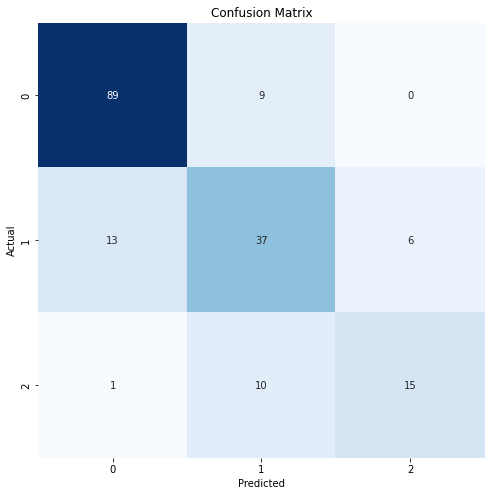

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.86      0.91      0.89        98
           1       0.66      0.66      0.66        56
           2       0.71      0.58      0.64        26

    accuracy                           0.78       180
   macro avg       0.75      0.72      0.73       180
weighted avg       0.78      0.78      0.78       180



In [ ]:
y_pred = model_gb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# Фаза 4: Модели, експерименти и резултати
***

In [ ]:
df = pd.read_csv('oasis_longitudinal.csv')
data_cross = pd.read_csv('oasis_cross-sectional.csv')

In [ ]:
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

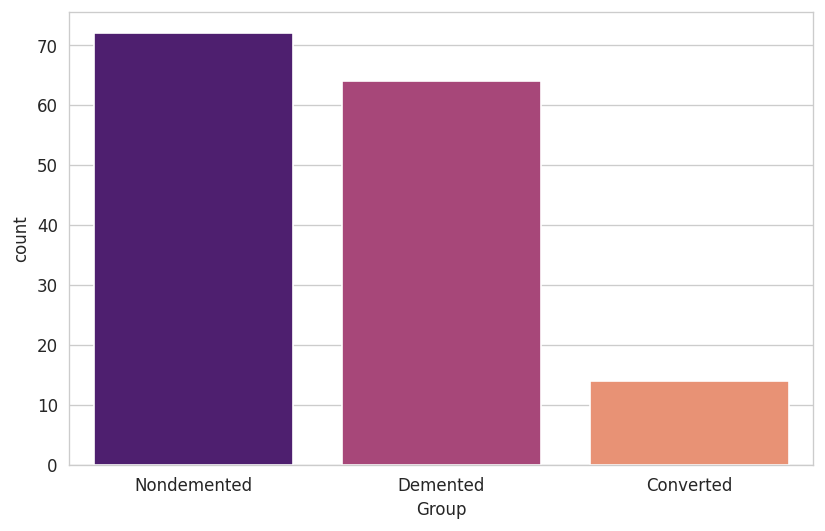

In [ ]:
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
fig, (ax) = plt.subplots(1, 1, figsize=(8, 5), dpi=120)
sns.countplot(x='Group', data=ex_df, palette='magma')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


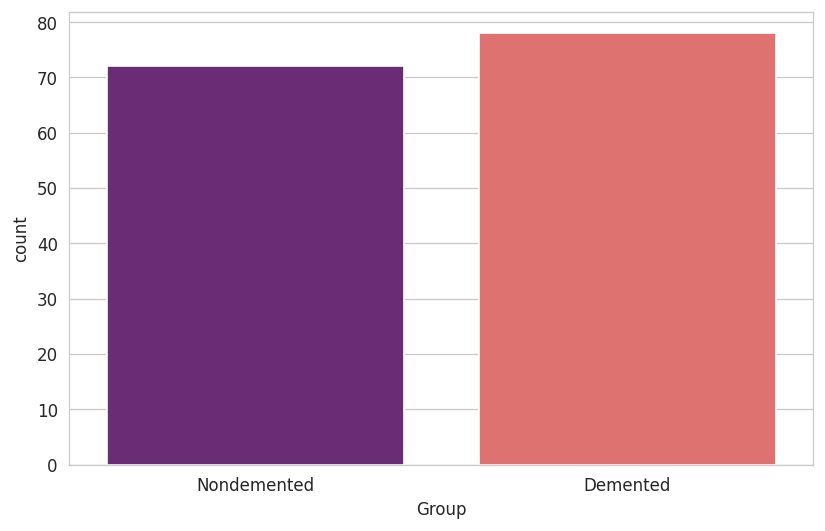

In [ ]:
fig, (ax) = plt.subplots(1, 1, figsize=(8, 5), dpi=120)

ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

sns.countplot(x='Group', data=ex_df, palette='magma')

plt.show()

In [ ]:
#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

In [ ]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    # plt.figure(1)
    fig, (ax) = plt.subplots(1, 1, figsize=(8, 5), dpi=100)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.RdGy)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), color='white')
    plt.show()


def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

total_fpr = {}
total_tpr = {}
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    # plt.figure()
    fig, (ax) = plt.subplots(1, 1, figsize=(8, 5), dpi=100)
    plt.plot(fpr, tpr, color='mediumpurple', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

## Модели
***

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

### Random Forest Classifier



Confusion Matrix:
[[45  7]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.88      0.82      0.84        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



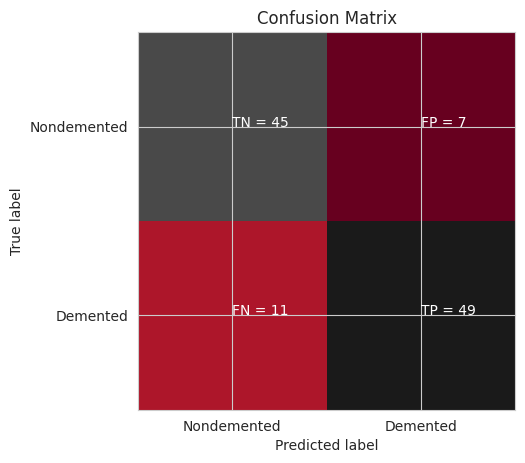

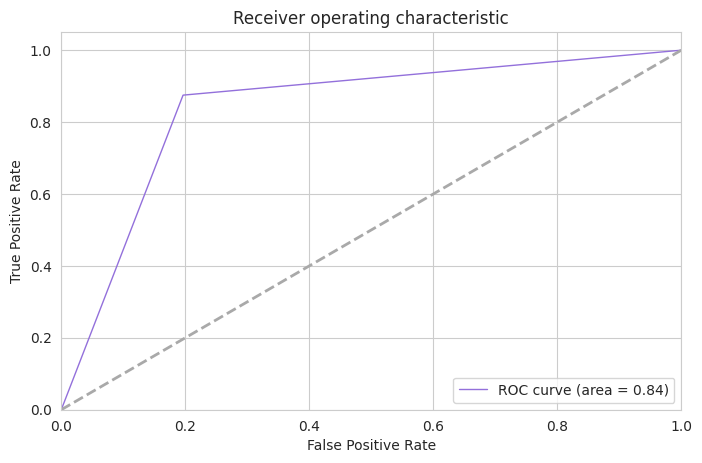


Acuuracy Of the Model:  0.8392857142857143 




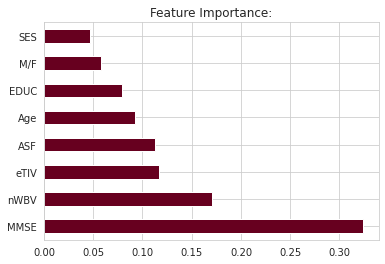

In [ ]:
rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=200)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
rfc.fit(X_train, y_train.ravel())
#print("Best parameters set found on development set:")
#print(rfc.best_params_)
report_performance(rfc) 
roc_curves(rfc)
accuracy(rfc)

feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh', cmap=plt.cm.RdGy)
plt.title("Feature Importance:")
plt.show()

### SVC



Confusion Matrix:
[[46  6]
 [19 41]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        52
           1       0.87      0.68      0.77        60

    accuracy                           0.78       112
   macro avg       0.79      0.78      0.78       112
weighted avg       0.80      0.78      0.78       112



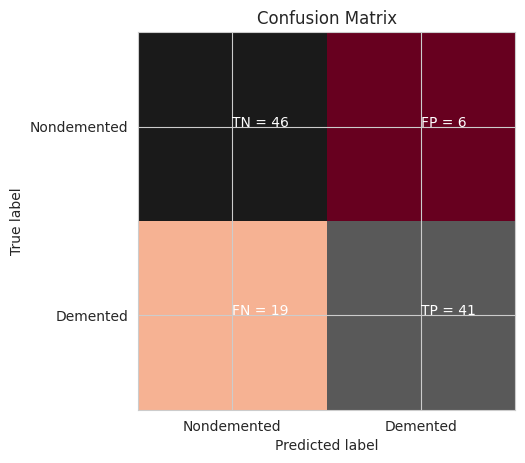

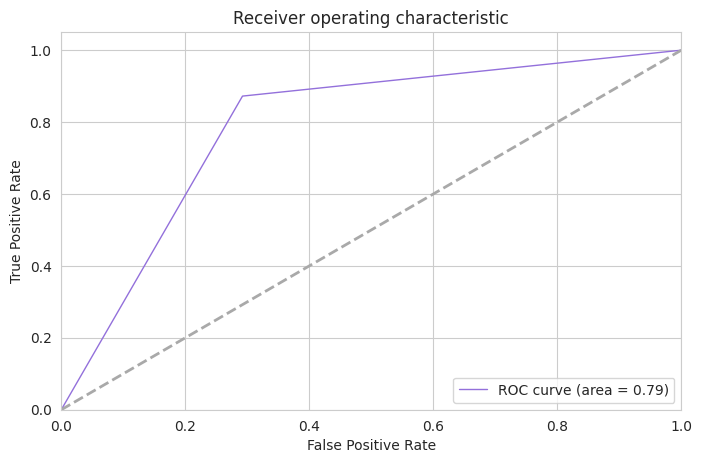


Acuuracy Of the Model:  0.7767857142857143 




In [ ]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)

### Decision Tree Classifier



Confusion Matrix:
[[43  9]
 [14 46]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        52
           1       0.84      0.77      0.80        60

    accuracy                           0.79       112
   macro avg       0.80      0.80      0.79       112
weighted avg       0.80      0.79      0.79       112



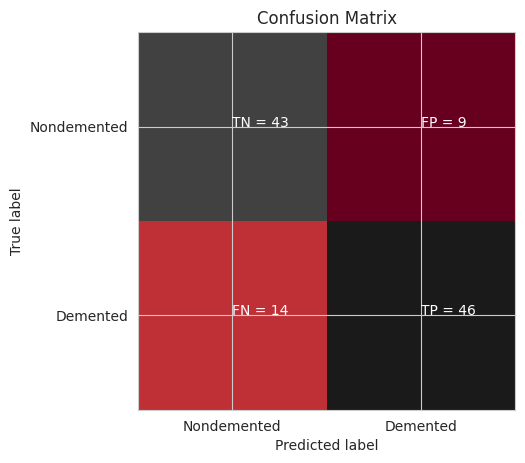

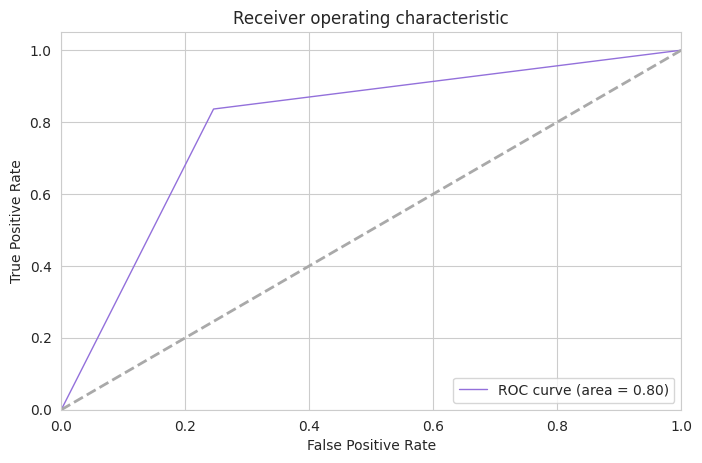


Acuuracy Of the Model:  0.7946428571428571 




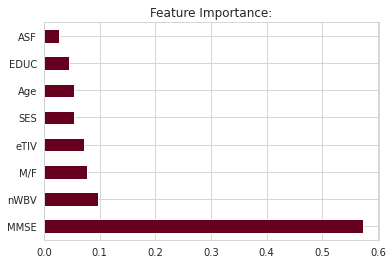

In [ ]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)
#importances = clf.feature_importances_


feat_importances = pd.Series(clf_dtc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh', cmap=plt.cm.RdGy)
plt.title("Feature Importance:")
plt.show()

### XGB Classifier



Confusion Matrix:
[[44  8]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        52
           1       0.86      0.82      0.84        60

    accuracy                           0.83       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.83      0.83      0.83       112



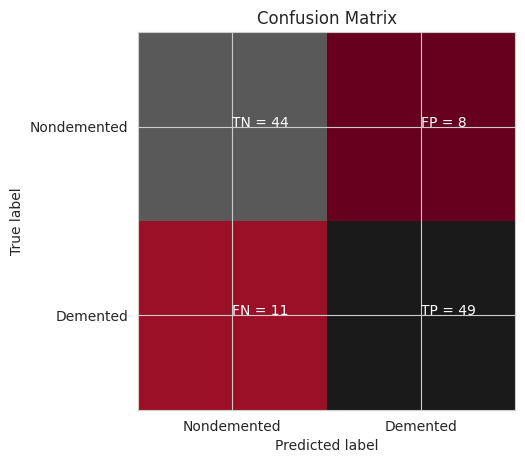

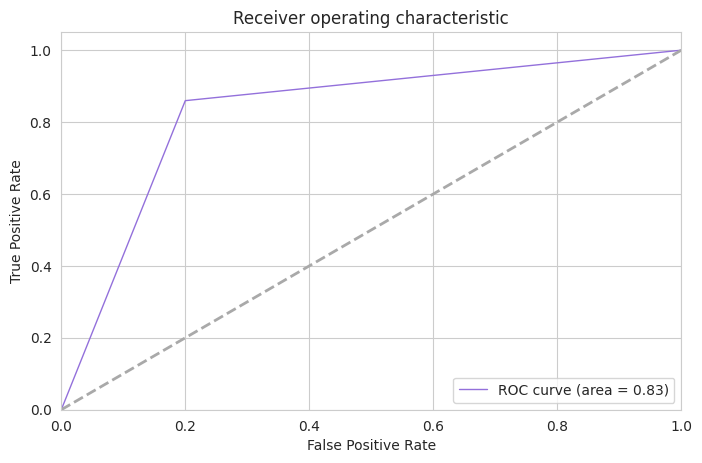


Acuuracy Of the Model:  0.8303571428571429 




In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance(clf_xgb) 
roc_curves(clf_xgb)
accuracy(clf_xgb)

### Voting Classifier

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection



Confusion Matrix:
[[44  8]
 [12 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        52
           1       0.86      0.80      0.83        60

    accuracy                           0.82       112
   macro avg       0.82      0.82      0.82       112
weighted avg       0.82      0.82      0.82       112



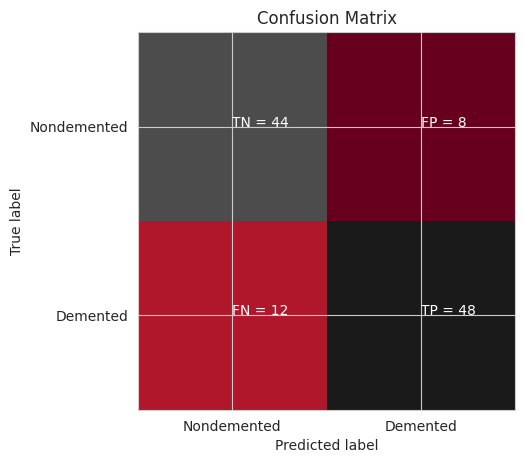

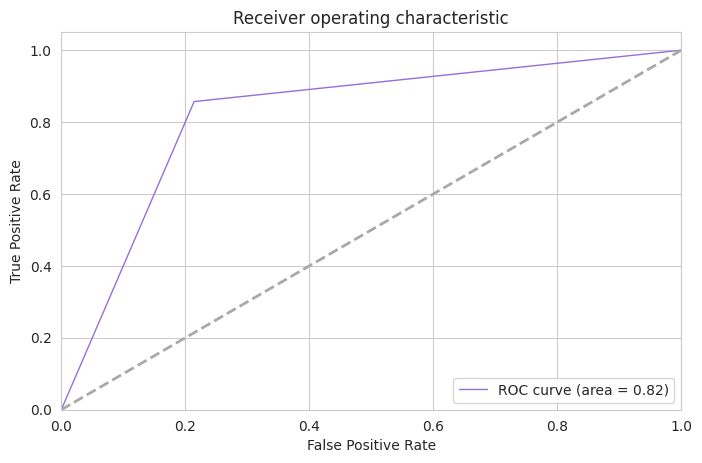


Acuuracy Of the Model:  0.8214285714285714 




Confusion Matrix:
[[44  8]
 [12 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        52
           1       0.86      0.80      0.83        60

    accuracy                           0.82       112
   macro avg       0.82      0.82      0.82       112
weighted avg       0.82      0.82      0.82       112



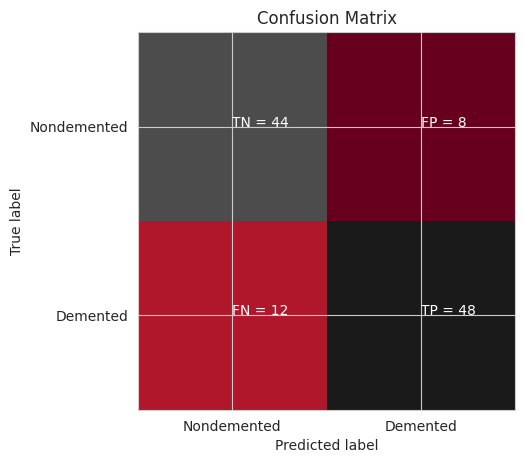

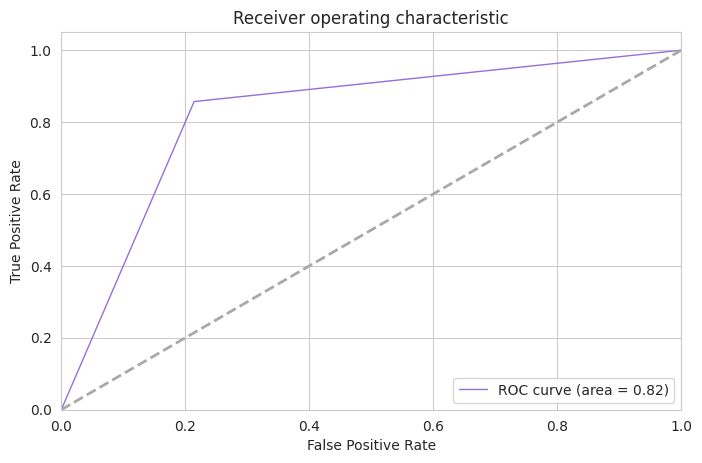


Acuuracy Of the Model:  0.8214285714285714 




In [ ]:
vote_est = [('etc',ensemble.ExtraTreesClassifier()),
            ('gb',GradientBoostingClassifier()),
            ('abc',AdaBoostClassifier()),
    ('rfc', ensemble.RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200)),
    #('svc', svm.SVC(probability=True)),
    #('xgb', XGBClassifier()),
            ('lbgm',LGBMClassifier())
           ]


vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train.ravel())
vote_hard.fit(X_train, y_train.ravel())
report_performance(vote_hard) 
roc_curves(vote_hard)
accuracy(vote_hard)

#pred = vote_hard.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")

vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train.ravel())
vote_soft.fit(X_train, y_train.ravel())
report_performance(vote_soft) 
roc_curves(vote_soft)
accuracy(vote_soft)

### Other classifiers

In [ ]:
clfs =[ExtraTreesClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()]

ExtraTreesClassifier : 


Confusion Matrix:
[[45  7]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        52
           1       0.88      0.83      0.85        60

    accuracy                           0.85       112
   macro avg       0.85      0.85      0.85       112
weighted avg       0.85      0.85      0.85       112



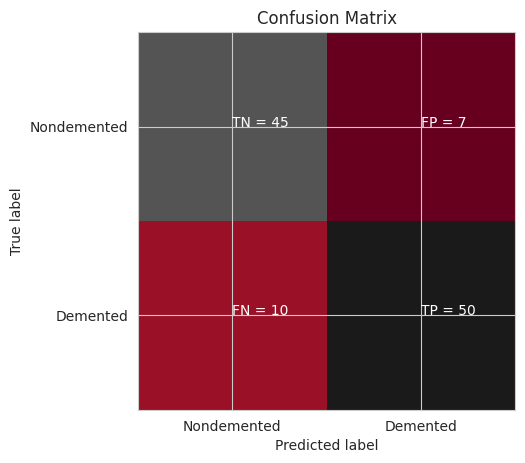

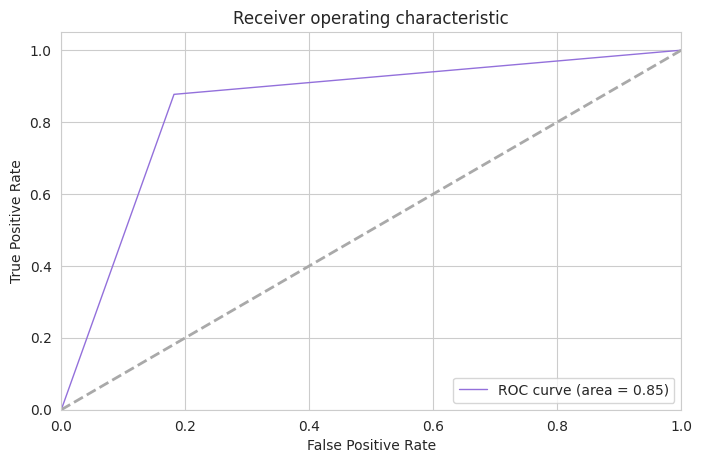


Acuuracy Of the Model:  0.8482142857142857 


GradientBoostingClassifier : 


Confusion Matrix:
[[45  7]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        52
           1       0.88      0.83      0.85        60

    accuracy                           0.85       112
   macro avg       0.85      0.85      0.85       112
weighted avg       0.85      0.85      0.85       112



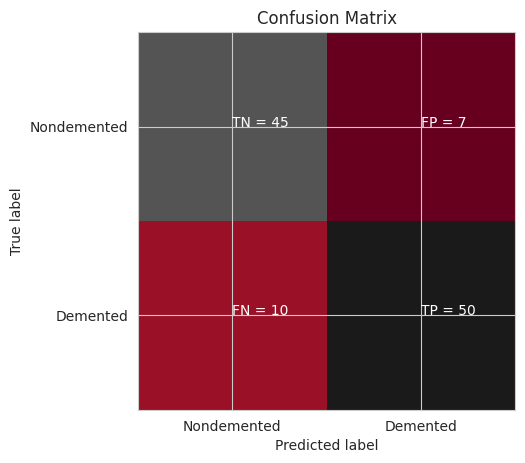

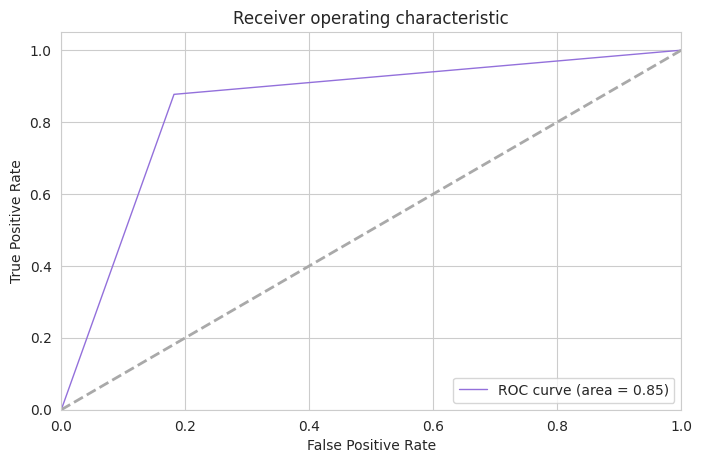


Acuuracy Of the Model:  0.8482142857142857 


AdaBoostClassifier : 


Confusion Matrix:
[[41 11]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        52
           1       0.82      0.82      0.82        60

    accuracy                           0.80       112
   macro avg       0.80      0.80      0.80       112
weighted avg       0.80      0.80      0.80       112



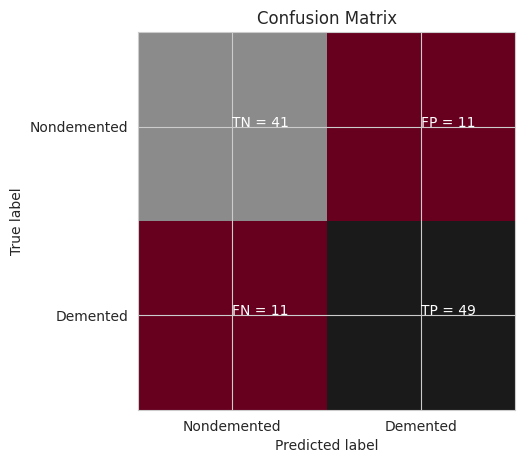

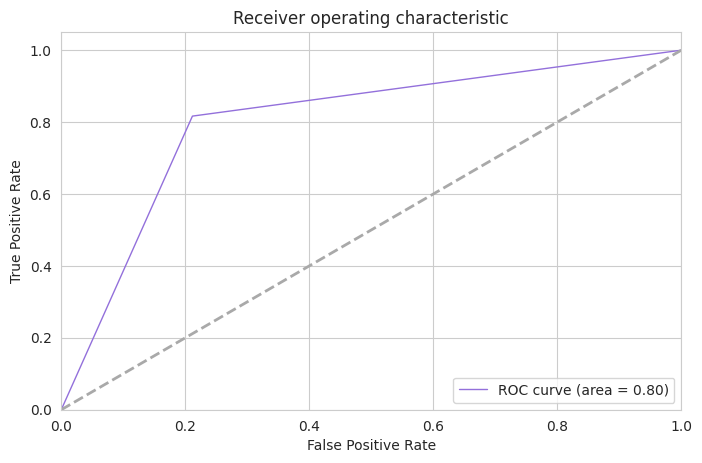


Acuuracy Of the Model:  0.8035714285714286 




In [ ]:
for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_train,y_train.ravel())
    X = pd.DataFrame(X_train)
    report_performance(model)
    roc_curves(model)
    accuracy(model)

## Споредба на прецизност на тренирање (accuracy)

Сортирање на вредностите на моделите

In [ ]:
total_accuracy_2 = {k: v for k, v in sorted(total_accuracy.items(), key=lambda item: item[1])}
print(total_accuracy_2)

{'SVC': 0.7767857142857143, 'DecisionTreeClassifier': 0.7946428571428571, 'AdaBoostClassifier': 0.8035714285714286, 'VotingClassifier': 0.8214285714285714, 'XGBClassifier': 0.8303571428571429, 'RandomForestClassifier': 0.8392857142857143, 'ExtraTreesClassifier': 0.8482142857142857, 'GradientBoostingClassifier': 0.8482142857142857}


In [ ]:
data = total_accuracy_2.values()
labels = total_accuracy_2.keys()

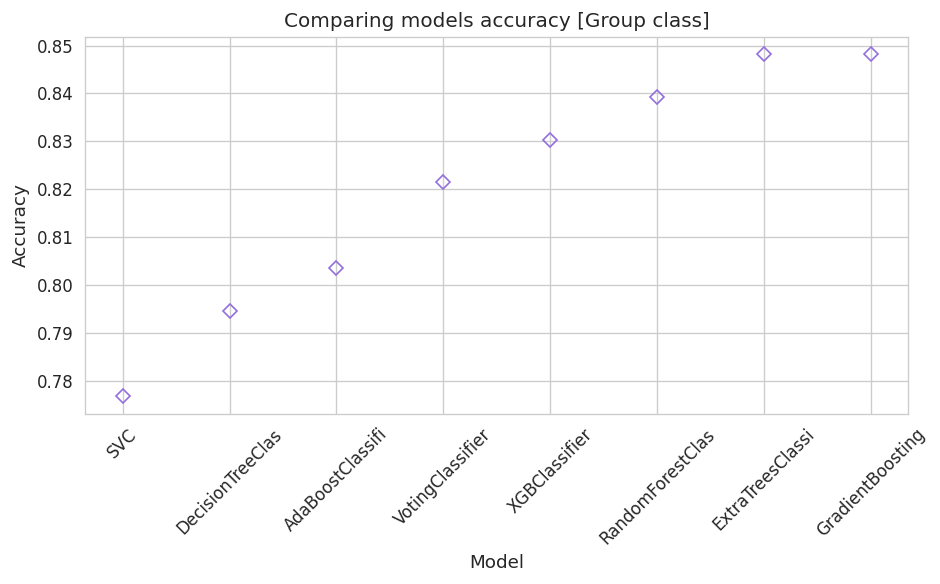

In [ ]:
fig, (ax) = plt.subplots(1, 1, figsize=(8, 5), dpi=120)

plt.plot([i for i, e in enumerate(data)], list(data), marker="D", markerfacecolor='None', color='mediumpurple', linestyle='None')
plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Comparing models accuracy [Group class]",fontsize = 12)
plt.xlabel('Model',fontsize = 11)
plt.xticks(rotation = 45)
plt.ylabel('Accuracy',fontsize = 11)
plt.tight_layout(pad=1.2)
plt.grid(True)
plt.show()

## ROC криви 

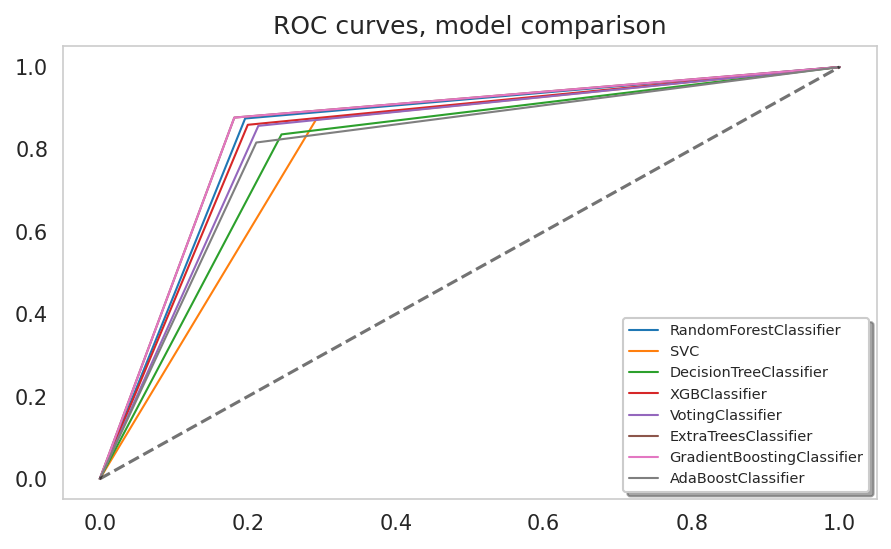

In [ ]:
fig, (ax) = plt.subplots(1, 1, figsize=(7, 4), dpi=150)

for i in total_fpr.keys():
    plt.plot(total_fpr[i],total_tpr[i],lw=1, label=i)
plt.plot([0, 1], [0, 1], color='black', lw=1.5, linestyle='--', alpha=0.55)
plt.legend(loc='lower right',
            fancybox=True,
            shadow=True,
            fontsize='x-small')
plt.title("ROC curves, model comparison",fontsize = 12)
plt.grid(False)
plt.show()